# WineQuality
_Ver. 20.06.2018.15.28_ <br> <br>
_Lucas Eduardo Cassan Alamino 201601821_ <br>
_Matheus_

### 1. Inspecione os dados

In [16]:
#Bibliotecas
import numpy as np
import pandas as pd

#Importação de Dados
data_train = pd.read_csv('data\wineQuality_train.data', sep = ",")
data_val= pd.read_csv('data\wineQuality_val.data',   sep = ",")

In [17]:
#Seleção de Dados
data_train= data_train[:500]
data_val= data_val[:500]

In [18]:
#Separacao de Feature e targets
X_train= data_train.drop('quality', 1)
Y_train= np.array( data_train['quality'])

X_val= data_val.drop('quality', 1)
Y_val= np.array( data_train['quality'])

In [3]:
data_train

NameError: name 'data_train' is not defined

In [19]:
#Demonstrativo
print( '\nExemplos')
print( 'Treino:   ', len(data_train.index) ) 
print( 'Validação:', len(data_val.index) ) 


Exemplos
Treino:    500
Validação: 500


### 2. Normalização

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

NameError: name 'X_train' is not defined

In [20]:
#Verificação de Tipo
print(type(X_train)) 
print(type(Y_train)) 
print(type(X_val)) 
print(type(Y_val)) 

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


### 3. Treine uma SVM

In [6]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy import interp

In [7]:
#Treinamento
classifier = svm.SVC(kernel='linear', C=0.01)
Y_pred = classifier.fit(X_train, Y_train).predict(X_val)

In [9]:
print(Y_pred[0:100])
print('\n')
print(Y_val[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


[1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0]


### 4. Classifique os Dados de Validação

### 5. Matriz de Confusão e Acurácia

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    print(title)
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Predito')

In [11]:
cnf_matrix = confusion_matrix(Y_val, Y_pred)
np.set_printoptions(precision=2)

Matriz de confusão (em quantidade de elementos)
[[396   0]
 [104   0]]


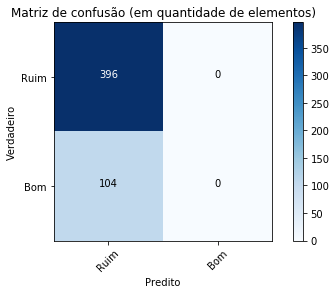

In [12]:
title  =  'Matriz de confusão (em quantidade de elementos)' 

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Ruim', 'Bom'], title=title)

Matriz de confusão (em %)
[[1. 0.]
 [1. 0.]]


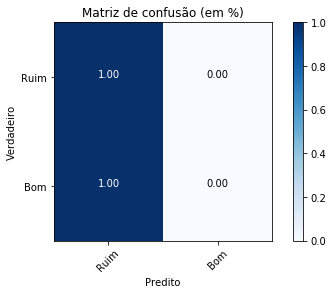

In [13]:
title = 'Matriz de confusão (em %)'

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Ruim', 'Bom'], title=title, normalize=True)

In [14]:
from sklearn.metrics import accuracy_score, recall_score

print('Classificações corretas =', accuracy_score(Y_val, Y_pred, normalize=False))
print('Acurácia =', accuracy_score(Y_val, Y_pred))
print('Acurácia normalizada =', recall_score(Y_val, Y_pred, average='macro'))

Classificações corretas = 396
Acurácia = 0.792
Acurácia normalizada = 0.5
